In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=20, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2, random_state=123)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

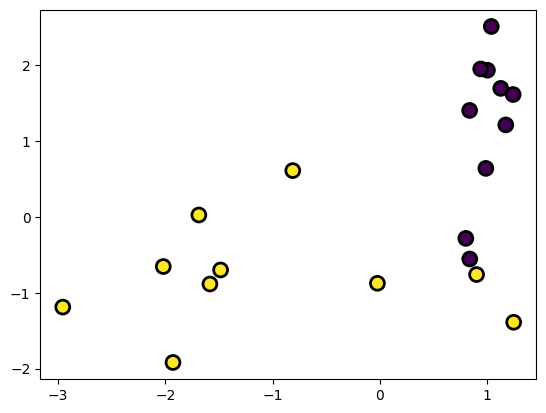

In [5]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100,
            edgecolors='k', linewidths=2)
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=2, init="random", n_init=10, random_state=1)

In [8]:
model.fit(X)

KMeans(init='random', n_clusters=2, n_init=10, random_state=1)

In [9]:
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [10]:
pred = model.predict(X)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [11]:
c0, c1 = model.cluster_centers_

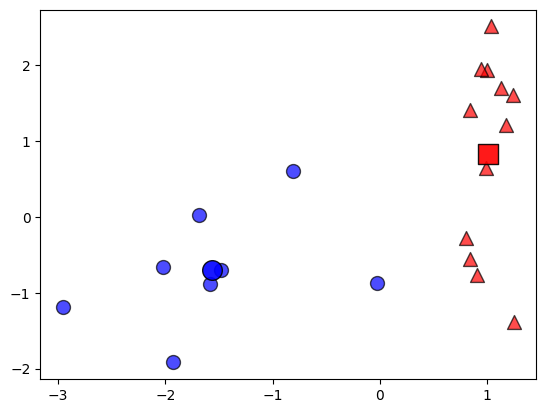

In [12]:
plt.scatter(x=X[model.labels_==0, 0], y=X[model.labels_==0, 1],
            s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1, 0], y=X[model.labels_==1, 1],
            s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1], s=200, 
            c='r', marker='s', edgecolor='k', alpha=0.9)
plt.scatter(x=c1[0], y=c1[1], 
            s=200, c='b', marker='o', edgecolor='k', alpha=0.9)
plt.show()

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.DataFrame(data=np.c_[X,
                             np.linalg.norm(X-c0, axis=1),
                             np.linalg.norm(X-c1, axis=1),
                             model.labels_],
                  columns=['X0', 'X1', 'd0', 'd1', 'class'])


In [15]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


In [16]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
                s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
                s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1], s=200, 
                c='r', marker='s', edgecolor='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1], 
                s=200, c='b', marker='o', edgecolor='k', alpha=0.9)

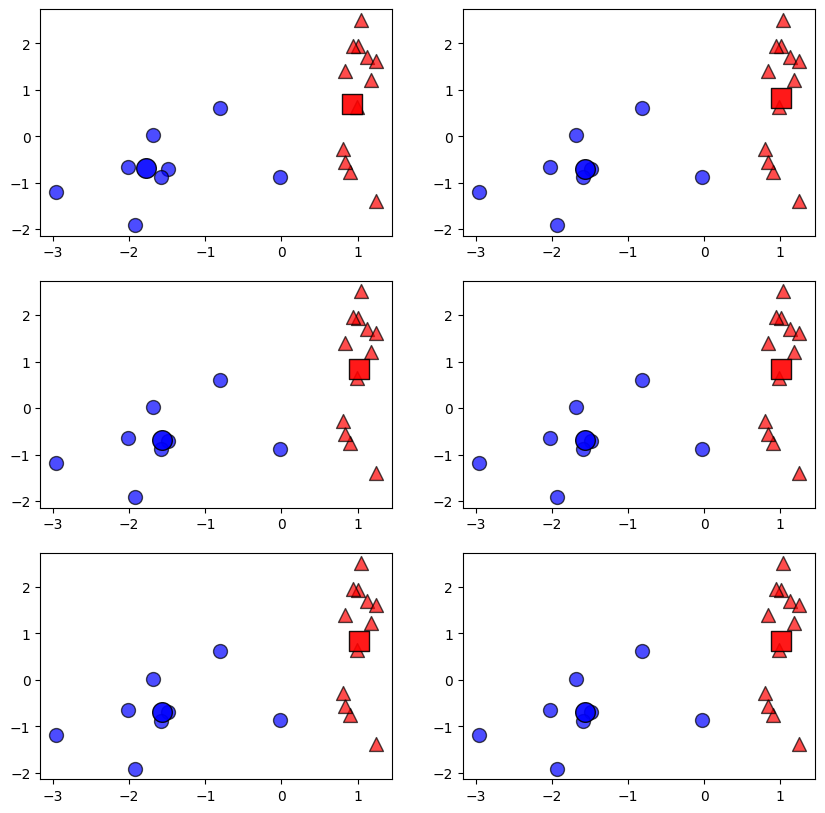

In [17]:
plt.figure(figsize=(10,10))
model1 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=1, random_state=1)
model1.fit(X)
plt.subplot(3,2,1)
plot_cluster(model1, X)

model2 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=2, random_state=1)
model2.fit(X)
plt.subplot(3,2,2)
plot_cluster(model2, X)

model3 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=3, random_state=1)
model3.fit(X)
plt.subplot(3,2,3)
plot_cluster(model3, X)

model4 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=4, random_state=1)
model4.fit(X)
plt.subplot(3,2,4)
plot_cluster(model4, X)

model5 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=5, random_state=1)
model5.fit(X)
plt.subplot(3,2,5)
plot_cluster(model5, X)

model6 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=6, random_state=1)
model6.fit(X)
plt.subplot(3,2,6)
plot_cluster(model6, X)
plt.show()

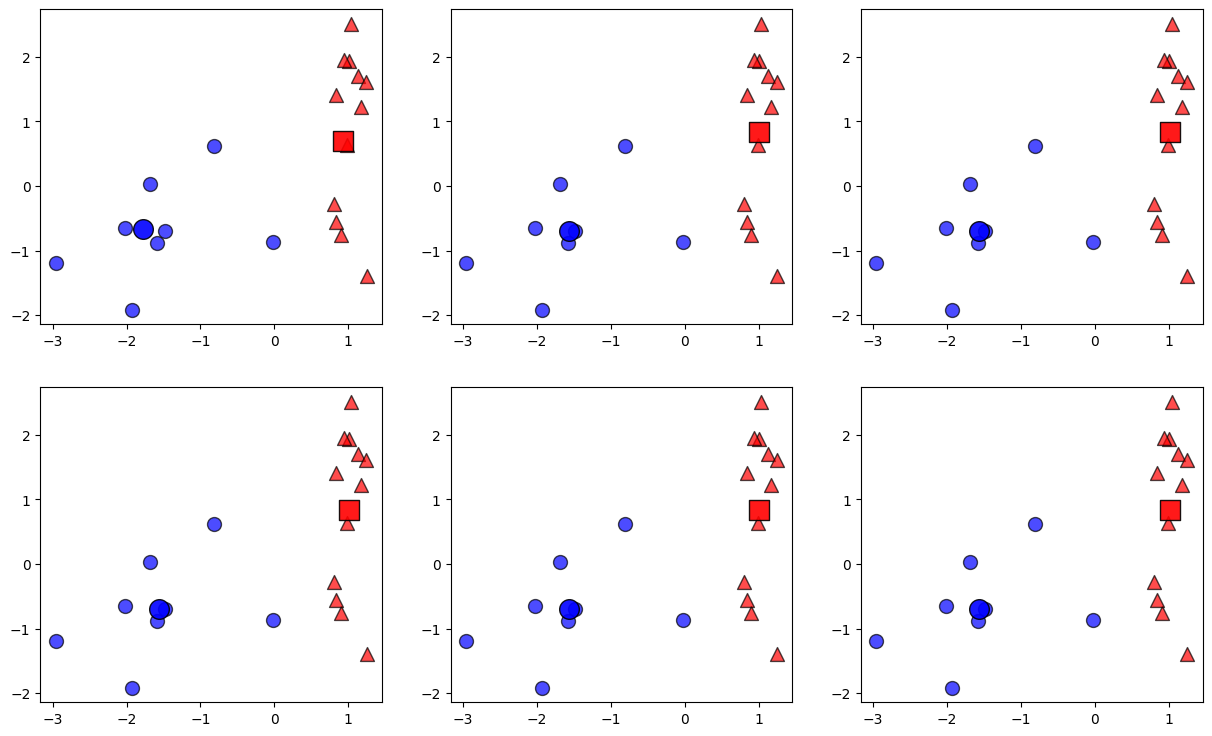

In [18]:
plt.figure(figsize=(15, 9))
for i in range(6):
    model = KMeans(n_clusters=2, init="random",
                   n_init=1, max_iter=(i+1),
                   random_state=1)
    model.fit(X)
    plt.subplot(2,3,(i+1))
    plot_cluster(model, X)

In [19]:
model = KMeans(n_clusters=2, init="random", max_iter=3, n_init=5, 
               random_state=1, verbose=1)

In [20]:
model.fit(X)

Initialization complete
Iteration 0, inertia 56.572595666636275.
Iteration 1, inertia 28.016427448880776.
Iteration 2, inertia 27.34154652643695.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 69.4041126765816.
Iteration 1, inertia 30.217873843504016.
Iteration 2, inertia 28.086599764263045.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 35.962382115903345.
Iteration 1, inertia 27.34154652643695.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 87.43567642286382.
Iteration 1, inertia 63.65086767457875.
Iteration 2, inertia 60.58393028565187.
Initialization complete
Iteration 0, inertia 164.57748693821847.
Iteration 1, inertia 37.65606157453839.
Iteration 2, inertia 28.086599764263045.
Converged at iteration 2: strict convergence.


KMeans(init='random', max_iter=3, n_clusters=2, n_init=5, random_state=1,
       verbose=1)

In [21]:
model.score(X)

-27.34154652643695

In [22]:
pred = model.predict(X)

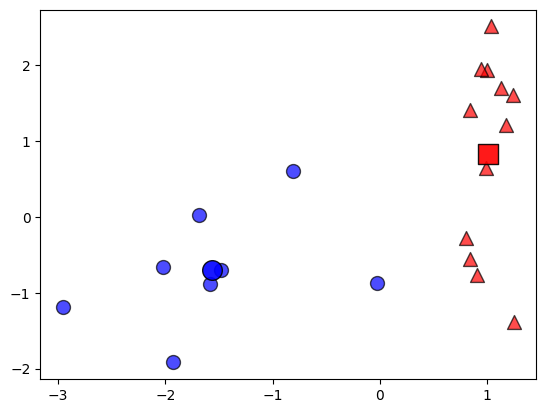

In [23]:
c0, c1 = model.cluster_centers_
plt.scatter(x=X[model.labels_==0, 0], y=X[model.labels_==0, 1],
            s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1, 0], y=X[model.labels_==1, 1],
            s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1], s=200, 
            c='r', marker='s', edgecolor='k', alpha=0.9)
plt.scatter(x=c1[0], y=c1[1], 
            s=200, c='b', marker='o', edgecolor='k', alpha=0.9)
plt.show()